In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('MBA.csv')
data.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [ ]:
data.shape

(6194, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [ ]:
data.isna().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


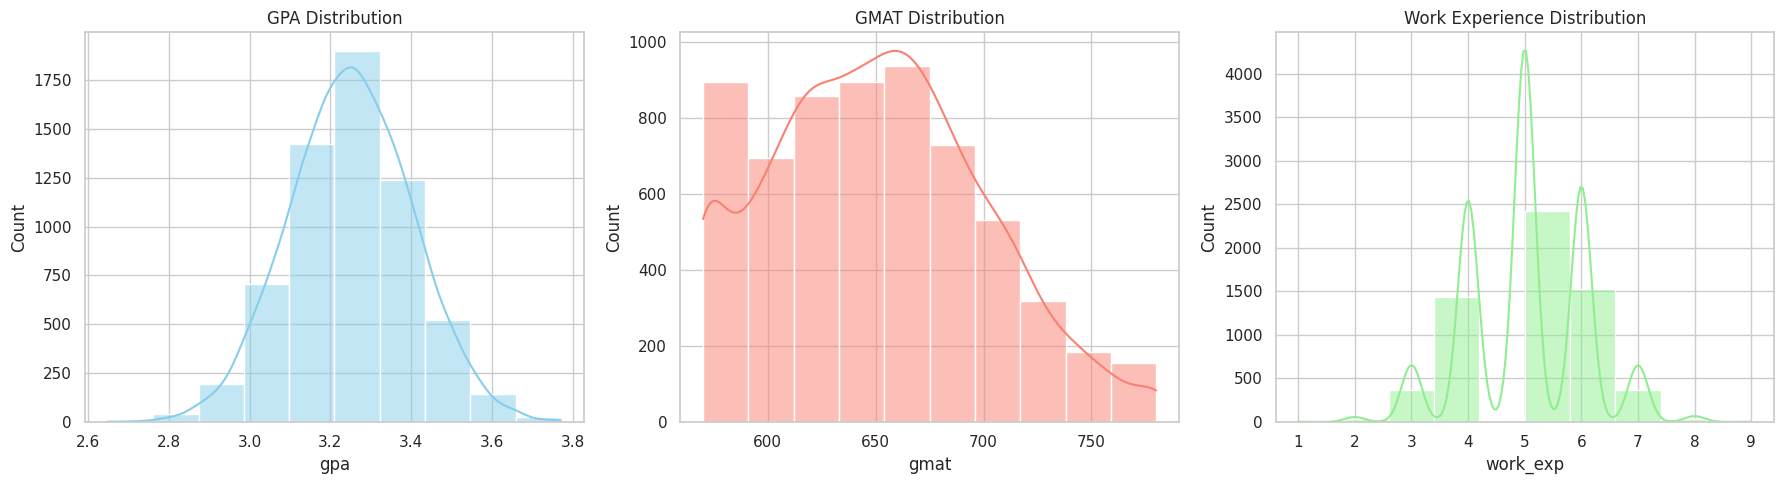

In [36]:
# Set up the plot style
sns.set(style="whitegrid")

# Plot histograms for the numerical variables to visualize their distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GPA distribution
sns.histplot(data['gpa'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('GPA Distribution')

# GMAT distribution
sns.histplot(data['gmat'], bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('GMAT Distribution')

# Work Experience distribution
sns.histplot(data['work_exp'], bins=10, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Work Experience Distribution')

plt.tight_layout()
plt.show()

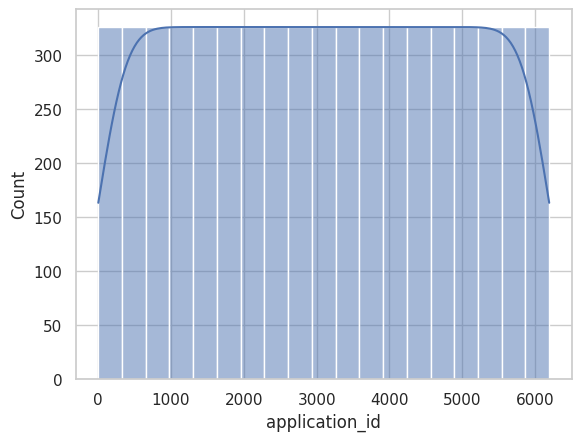

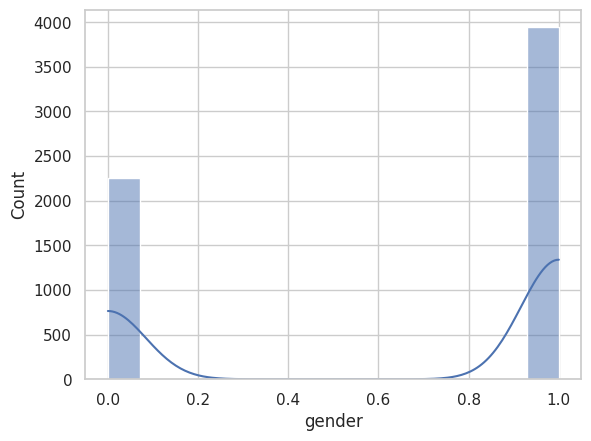

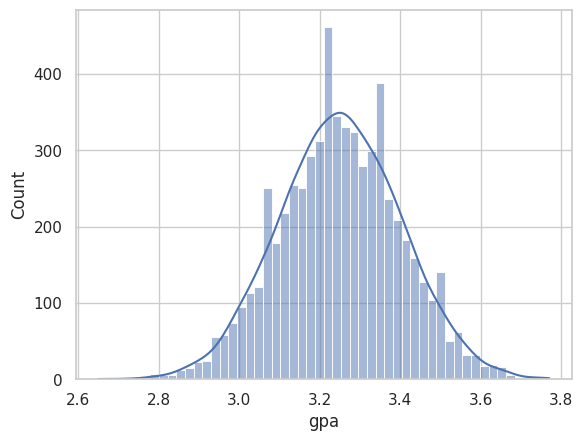

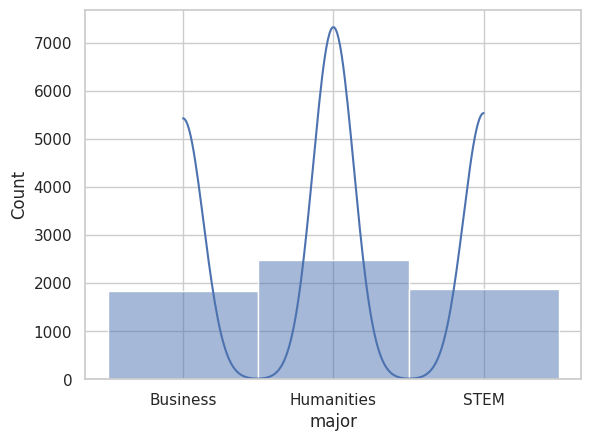

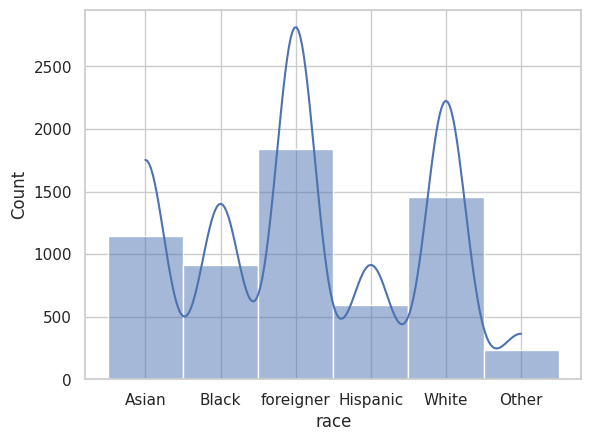

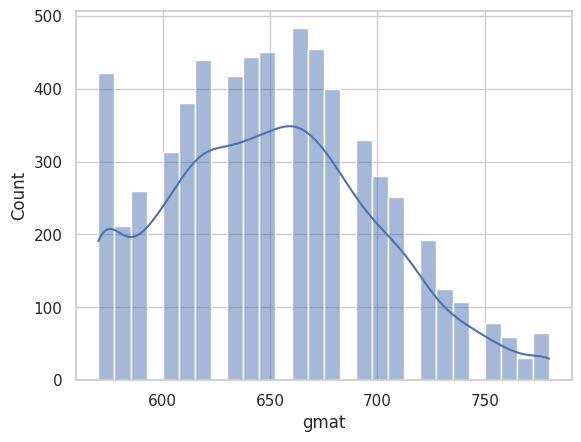

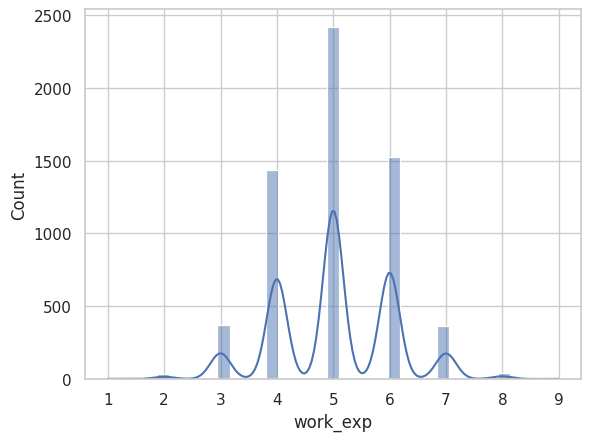

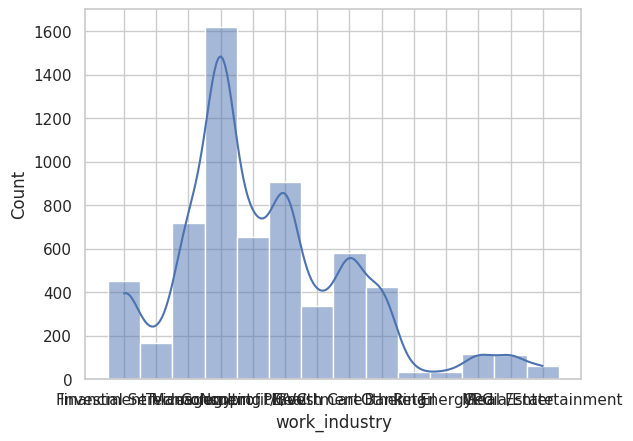

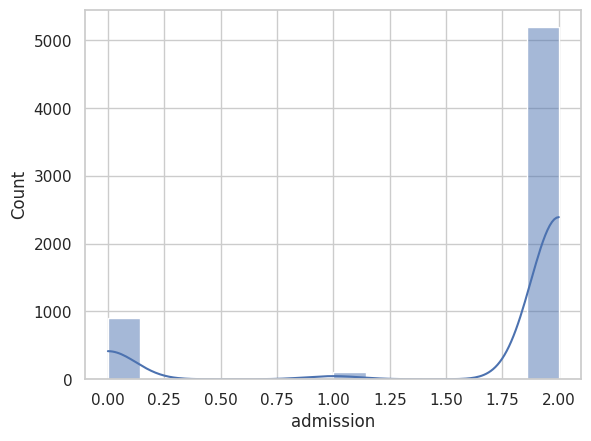

In [37]:
for col in data:
    sns.histplot(x=col, data=data, kde=True)
    plt.show()

In [3]:
columns_not_categ = [key for key in data.columns if data[key].dtype in ('float64', 'int64')]
columns_cat = [key for key in data.columns if data[key].dtype == 'object']

#columns_cat.remove('admission')
print("некатегориальные признаки:", columns_not_categ)
print("категориальные признаки:", columns_cat)

некатегориальные признаки: ['application_id', 'gpa', 'gmat', 'work_exp']
категориальные признаки: ['gender', 'major', 'race', 'work_industry', 'admission']


In [4]:
from sklearn.preprocessing import StandardScaler
class BaseDataPreproccesor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, needed_columns=None):
        self.scaler = StandardScaler()
        self.needed_columns = needed_columns

    def fit(self, data, y=None):
        # Если заданы конкретные колонки для масштабирования
        if self.needed_columns is not None:
            self.data_columns = data.columns  # Сохраним исходные колонки
            data = data[self.needed_columns]
        self.scaler.fit(data)
        return self

    def transform(self, data, y=None):
        # Масштабируем только нужные колонки
        if self.needed_columns is not None:
            data_scaled = self.scaler.transform(data[self.needed_columns])
            # Преобразуем обратно в DataFrame с сохранением индексов и названий колонок
            data_scaled = pd.DataFrame(data_scaled, columns=self.needed_columns, index=data.index)
            # Оставляем категориальные признаки нетронутыми
            data_rest = data.drop(columns=self.needed_columns)
            # Объединяем масштабированные данные с немасштабированными
            data = pd.concat([data_scaled, data_rest], axis=1)
        else:
            data = self.scaler.transform(data)
        return data

In [ ]:
data['admission'].unique()

array(['Admit', nan, 'Waitlist'], dtype=object)

In [5]:
data['race'] = data['race'].fillna('foreigner')
data['admission'] = data['admission'].fillna('no')
data['admission'] = data['admission'].replace({'Admit': 0, 'Waitlist': 1, 'no': 2})
columns_cat.remove('admission')
columns_not_categ.append('admission')

In [ ]:
data.sample(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
2403,2404,Female,False,3.07,Humanities,Asian,580.0,6.0,Financial Services,-1
119,120,Female,True,2.99,Humanities,foreigner,570.0,6.0,Real Estate,1
49,50,Male,False,3.38,STEM,Hispanic,680.0,5.0,Consulting,-1
1169,1170,Female,False,3.47,STEM,White,740.0,3.0,Technology,1
5997,5998,Female,True,3.12,STEM,foreigner,620.0,4.0,Technology,-1


In [ ]:
data['admission'].unique()

array([ 1, -1,  0])

In [ ]:
data['race'].unique()

array(['Asian', 'Black', 'foreigner', 'Hispanic', 'White', 'Other'],
      dtype=object)

In [ ]:
data['work_industry'].unique()

array(['Financial Services', 'Investment Management', 'Technology',
       'Consulting', 'Nonprofit/Gov', 'PE/VC', 'Health Care',
       'Investment Banking', 'Other', 'Retail', 'Energy', 'CPG',
       'Real Estate', 'Media/Entertainment'], dtype=object)

In [ ]:
data['major'].unique()

array(['Business', 'Humanities', 'STEM'], dtype=object)

In [6]:
print(data[data['race'] == 'foreigner']['race'].count(), data[data['international'] == True]['international'].count())

1842 1842


#То есть столбец international не нужен, так как будет мультиколлинеарность

In [6]:
data = data.drop('international', axis=1)
data.head()

,application_id,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,3.30,Business,Asian,620.0,3.0,Financial Services,0
1,2,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,2
2,3,Female,3.30,Business,foreigner,710.0,5.0,Technology,0
3,4,Male,3.47,STEM,Black,690.0,6.0,Technology,2
4,5,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   gpa             6194 non-null   float64
 3   major           6194 non-null   object 
 4   race            6194 non-null   object 
 5   gmat            6194 non-null   float64
 6   work_exp        6194 non-null   float64
 7   work_industry   6194 non-null   object 
 8   admission       6194 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 435.6+ KB


In [ ]:
data['gender'].unique() # отлично что их не сотня 8)

array(['Female', 'Male'], dtype=object)

In [7]:
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})
columns_cat.remove('gender')

In [8]:
columns_cat

['major', 'race', 'work_industry']

In [9]:
columns_not_categ

['application_id', 'gpa', 'gmat', 'work_exp', 'admission']

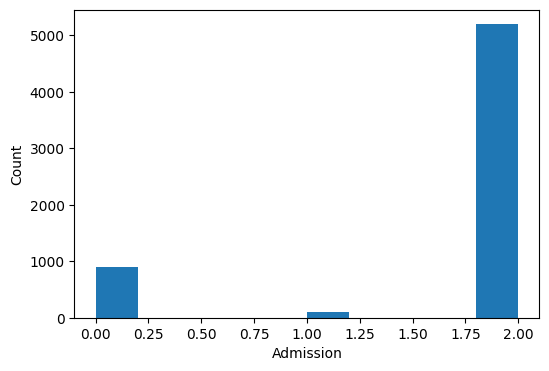

In [8]:
plt.figure(figsize=(6, 4))
plt.hist(data['admission'])
plt.xlabel('Admission')
plt.ylabel('Count')
plt.show()

# Классы распределенны сильно неравномерно. Очевидно, метрика качества accuracy тут не подойдет. Делить данные на train и test тоже нужно аккуратно, чтобы попали элементы всех классов в равной степени. Для этого поможет стратификация.

In [ ]:
data[data['admission'] == 1]['admission'].count()

100

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False) #воспользуемся сначала one-hot кодированием

data_ohe_cat = pd.DataFrame(ohe.fit_transform(data[columns_cat]), columns = ohe.get_feature_names_out(columns_cat))
data1 = pd.concat([data[columns_not_categ], data_ohe_cat], axis=1)
data1.head()

,application_id,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,3.30,620.0,3.0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.28,680.0,5.0,2,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.30,710.0,5.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,3.47,690.0,6.0,2,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,3.35,590.0,5.0,2,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Посмотрим как на наших данных работают классические методы машинного обучения. Воспользуемся Oversampling для элементов редкого класса.

In [11]:
X1 = data1[data1.columns.drop('admission')]
y1 = data1['admission']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)

In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer

In [16]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = XGBClassifier()
model4 = LogisticRegression()
model5 = CatBoostClassifier()

all_collumns = X1.columns
X_train = pd.DataFrame(X_train, columns=all_collumns)
X_test = pd.DataFrame(X_test, columns=all_collumns)
y_train = pd.DataFrame(y_train, columns=['admission'])
y_test = pd.DataFrame(y_test, columns=['admission'])
columns_not_categ.remove('admission')
preprocessor = BaseDataPreproccesor(needed_columns=columns_not_categ)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scorer_f1 = make_scorer(f1_score, average='macro')


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
X_cont = np.concatenate([X_train, X_test], axis = 0)
Y_cont = np.concatenate([y_train, y_test], axis = 0)
#X_cont = pd.DataFrame(X_cont, columns=all_collumns)
#Y_cont = pd.DataFrame(Y_cont, columns=['admission'])
cv = KFold(n_splits=5, shuffle=True, random_state=42)
pipeline1 = Pipeline([
    ('classifier', model1)
])

scores_tree = cross_val_score(pipeline1, X_cont, Y_cont, cv=cv, scoring=scorer_f1)
print(scores_tree)
print(scores_tree.mean())

[0.44935866 0.42032039 0.4595241  0.41486732 0.42461256]
0.43373660767694383


In [21]:
pipeline2 = Pipeline([
    ('classifier', model2)
])
scorer_auc = make_scorer(roc_auc_score)
scores_random_fores_f1 = cross_val_score(pipeline2, X_cont, Y_cont, cv=cv, scoring=scorer_f1)
#scores_random_fores_roc_auc = cross_val_score(pipeline2, X_cont, Y_cont, cv=cv, scoring=scorer_auc)
print(scores_random_fores_f1)
print(scores_random_fores_f1.mean())

[0.39053693 0.37117915 0.37579381 0.38332415 0.36974305]
0.37811541740934096


In [23]:
pipeline3 = Pipeline([
    ('classifier', model3)
])
scores_xg = cross_val_score(pipeline3, X_cont, Y_cont, cv=cv, scoring=scorer_f1)
#scores_random_fores_roc_auc = cross_val_score(pipeline2, X_cont, Y_cont, cv=cv, scoring=scorer_auc)
print(scores_xg)
print(scores_xg.mean())

[0.41845071 0.42747315 0.39489846 0.39596585 0.38281085]
0.40391980323325233


In [38]:
pipeline5 = Pipeline([
    ('classifier', model5)
])
scores_catboost = cross_val_score(pipeline5, X_cont, Y_cont, cv=cv, scoring=scorer_f1)
#scores_random_fores_roc_auc = cross_val_score(pipeline2, X_cont, Y_cont, cv=cv, scoring=scorer_auc)
print(scores_catboost)
print(scores_catboost.mean())

Выходные данные были обрезаны до нескольких последних строк (5000).
6:	learn: 0.6671395	total: 26.8ms	remaining: 3.8s
7:	learn: 0.6358894	total: 30.2ms	remaining: 3.74s
8:	learn: 0.6071425	total: 33.6ms	remaining: 3.7s
9:	learn: 0.5823763	total: 36.4ms	remaining: 3.6s
10:	learn: 0.5613606	total: 40ms	remaining: 3.59s
11:	learn: 0.5417544	total: 43.7ms	remaining: 3.6s
12:	learn: 0.5222186	total: 47.2ms	remaining: 3.58s
13:	learn: 0.5067935	total: 50.7ms	remaining: 3.57s
14:	learn: 0.4930832	total: 54ms	remaining: 3.55s
15:	learn: 0.4801674	total: 57.4ms	remaining: 3.53s
16:	learn: 0.4697129	total: 60.7ms	remaining: 3.51s
17:	learn: 0.4604894	total: 63.9ms	remaining: 3.49s
18:	learn: 0.4510256	total: 67.1ms	remaining: 3.46s
19:	learn: 0.4443026	total: 69.7ms	remaining: 3.42s
20:	learn: 0.4368791	total: 72.9ms	remaining: 3.4s
21:	learn: 0.4289776	total: 76.2ms	remaining: 3.39s
22:	learn: 0.4225476	total: 79.5ms	remaining: 3.38s
23:	learn: 0.4164728	total: 82.7ms	remaining: 3.36s
24:	learn

In [25]:
print(scores_catboost)
print(scores_catboost.mean())

[0.40222824 0.40310995 0.40085717 0.38594181 0.39588175]
0.39760378191070705


# Качество совсем некудышное. Нужно попробовать поподбирать гиперпараметры и увеличить выборку синтетическими данными.

В нашем датасете у категориальных признаков уникальных значений немного, поэтому заместо one-hot-encoding можем воспользоваться label-encoding, он будет лучше работать на небольшом датасете, так как не увеличит размерность пространства признаков.

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2 = data.copy()
for column in columns_cat:
    data2[column] = le.fit_transform(data2[column])
data2.head()

,application_id,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,3.30,0,0,620.0,3.0,3,0
1,2,1,3.28,1,1,680.0,5.0,6,2
2,3,0,3.30,0,5,710.0,5.0,13,0
3,4,1,3.47,2,1,690.0,6.0,13,2
4,5,1,3.35,2,2,590.0,5.0,1,2


In [28]:
X2 = data2[data2.columns.drop('admission')]
y2 = data2['admission']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

In [30]:
!pip install imbalanced-learn

Метод SMOTE увеличит количество элементов редких классов в выборке. Тем самым будет проще моделе увидеть зависимости, присущие только редким классам.

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_train_resampled.value_counts())

admission
2    4155
0     720
1      80
Name: count, dtype: int64
admission
2    4155
0    4155
1    4155
Name: count, dtype: int64


In [32]:
pipeline_smote = Pipeline([
    ('classifier', model5)
])
pipeline_smote.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline_smote.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

Learning rate set to 0.089992
0:	learn: 1.0236628	total: 8.42ms	remaining: 8.41s
1:	learn: 0.9657556	total: 16.1ms	remaining: 8.04s
2:	learn: 0.9216925	total: 23.8ms	remaining: 7.91s
3:	learn: 0.8805314	total: 33ms	remaining: 8.21s
4:	learn: 0.8444520	total: 40.7ms	remaining: 8.09s
5:	learn: 0.8146457	total: 48.2ms	remaining: 7.98s
6:	learn: 0.7879384	total: 56.2ms	remaining: 7.97s
7:	learn: 0.7616942	total: 63.9ms	remaining: 7.93s
8:	learn: 0.7407449	total: 96.2ms	remaining: 10.6s
9:	learn: 0.7224692	total: 109ms	remaining: 10.8s
10:	learn: 0.7038241	total: 121ms	remaining: 10.9s
11:	learn: 0.6881269	total: 133ms	remaining: 10.9s
12:	learn: 0.6733293	total: 144ms	remaining: 10.9s
13:	learn: 0.6608484	total: 154ms	remaining: 10.8s
14:	learn: 0.6511207	total: 169ms	remaining: 11.1s
15:	learn: 0.6408478	total: 178ms	remaining: 10.9s
16:	learn: 0.6321120	total: 187ms	remaining: 10.8s
17:	learn: 0.6227952	total: 197ms	remaining: 10.8s
18:	learn: 0.6135778	total: 207ms	remaining: 10.7s
19:	

# Качество получилось улучшить, было 0.4, стало с методом SMOTE 0.54, но все равно пока что этого мало.

Построим сетку гиперпараметров для самой сильной модели(градиентного бустинга над решающими деревьями в реализации CatBoost) и найдем лучшую совокупность параметров модели.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'iterations' : [100, 300, 500, 100],
    'learning_rate' : [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1, 2],
    'random_strength': [0.1, 0.2, 0.5],
    'grow_policy': ['SymmetricTree', 'Lossguide'],
    'verbose': [False]
}

catboost_clf = CatBoostClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=catboost_clf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
print(best_params, best_estimator, random_search.best_score_, sep='\n')


{'verbose': False, 'random_strength': 0.2, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'grow_policy': 'SymmetricTree', 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}
0.9136272811323529


In [35]:
pred = best_estimator.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.5519812203453641


Получилось улучшить скор на 1% с помощью подбора гиперпараметров random search. Датасет оказался сложным, мало данных, следовательно, легче переобучиться, что у нас и вышло в последнем эксперименте. Также осложнила анализ несбалансированность классов, метод SMOTE улучшил качество, но не является лучшим решением проблемы.